# AMATH 563 Homework 4

Christopher Liu

In [192]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

## KS Oscillator

### Load data

In [193]:
data = loadmat('kuramoto_sivishinky.mat')

In [194]:
uu = data["uu"]
tt = data["tt"]
x  = data["x"]

### Model

In [195]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
from sklearn.metrics import mean_squared_error

In [196]:
#Iteratively predict the behavior given the initial condition and compare with a specified output
#Returns the total MSE, cumulative MSE for each iteration and the predicted output. 
def kspredict(data, label):
    prediction = np.zeros(label.shape)
    mse_iter = np.zeros(label.shape[0])
    
    init = np.reshape(data[0,:],(1,data.shape[1]))
    xk = init
    for i in range(0,prediction.shape[0]):
        prediction[i,:] = model_ks.predict(xk)
        mse_iter[i] = mean_squared_error(label[0:i+1,:],prediction[0:i+1,:])
        
        xk = np.reshape(prediction[i,:],(1,data.shape[1]))
    return mean_squared_error(label,prediction), mse_iter, prediction

In [197]:
#Defining the input and output
ks_input = uu[:,0:-1].T
ks_output = uu[:,1:].T

In [198]:
model_ks = keras.Sequential()

model_ks.add(layers.Dense(100, activation='linear',  input_shape = (1024,)))
model_ks.add(layers.Dense(100, activation='relu'))
model_ks.add(layers.Dense(1024))

model_ks.compile(loss='mean_squared_error', optimizer="adam", metrics=['accuracy'])
hist = model_ks.fit(ks_input, ks_output, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/sample - loss: 1.0872 - acc: 0.0000e+00
Epoch 2/100
250/250 [==============================] - 0s 112us/sample - loss: 0.7207 - acc: 0.0000e+00
Epoch 3/100
250/250 [==============================] - 0s 116us/sample - loss: 0.4399 - acc: 0.0000e+00
Epoch 4/100
250/250 [==============================] - 0s 112us/sample - loss: 0.2945 - acc: 0.0040
Epoch 5/100
250/250 [==============================] - 0s 112us/sample - loss: 0.2037 - acc: 0.0120
Epoch 6/100
250/250 [==============================] - 0s 132us/sample - loss: 0.1448 - acc: 0.0160
Epoch 7/100
250/250 [==============================] - 0s 124us/sample - loss: 0.1084 - acc: 0.1080
Epoch 8/100
250/250 [==============================] - 0s 132us/sample - loss: 0.0838 - acc: 0.1680
Epoch 9/100
250/250 [==============================] - 0s 132us/sample - loss: 0.0687 - acc: 0.1120
Epoch 10/100
250/250 [==============================] - 0s 148us/sample - loss: 0.0572 - a

250/250 [==============================] - 0s 108us/sample - loss: 0.0019 - acc: 0.2920
Epoch 83/100
250/250 [==============================] - 0s 104us/sample - loss: 0.0019 - acc: 0.2480
Epoch 84/100
250/250 [==============================] - 0s 108us/sample - loss: 0.0018 - acc: 0.2880
Epoch 85/100
250/250 [==============================] - 0s 104us/sample - loss: 0.0018 - acc: 0.3280
Epoch 86/100
250/250 [==============================] - 0s 112us/sample - loss: 0.0017 - acc: 0.2640
Epoch 87/100
250/250 [==============================] - 0s 108us/sample - loss: 0.0017 - acc: 0.3000
Epoch 88/100
250/250 [==============================] - 0s 112us/sample - loss: 0.0017 - acc: 0.3120
Epoch 89/100
250/250 [==============================] - 0s 108us/sample - loss: 0.0018 - acc: 0.3360
Epoch 90/100
250/250 [==============================] - 0s 108us/sample - loss: 0.0020 - acc: 0.2840
Epoch 91/100
250/250 [==============================] - 0s 104us/sample - loss: 0.0020 - acc: 0.2720
Epo

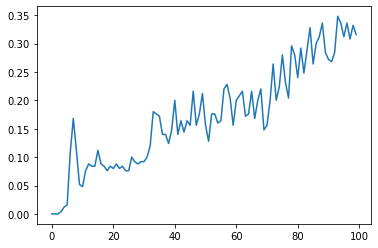

In [199]:
plt.plot(hist.history['acc'])

In [200]:
mse, mse_iter, predict_ks = kspredict(ks_input,ks_output)

In [201]:
mse

1.1216805129140741

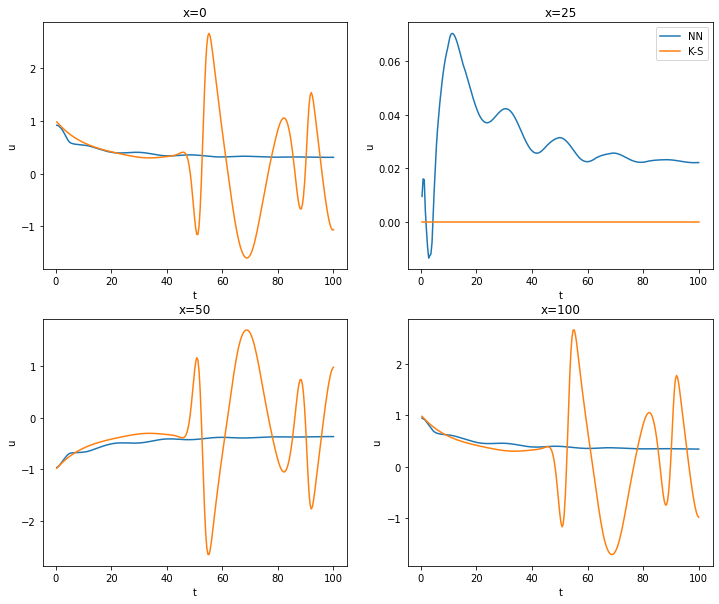

In [283]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(tt[0,1:],predict_ks[:,0])
plt.plot(tt[0,1:],ks_output[:,0])
plt.title('x=%i' %x[0,0])
plt.ylabel('u')
plt.xlabel('t')

plt.subplot(2,2,2)
plt.plot(tt[0,1:],predict_ks[:,255])
plt.plot(tt[0,1:],ks_output[:,255])
plt.legend(['NN','K-S'])
plt.title('x=%i' %x[255,0])
plt.ylabel('u')
plt.xlabel('t')

plt.subplot(2,2,3)
plt.plot(tt[0,1:],predict_ks[:,511])
plt.plot(tt[0,1:],ks_output[:,511])
plt.title('x=%i' %x[511,0])
plt.ylabel('u')
plt.xlabel('t')

plt.subplot(2,2,4)
plt.plot(tt[0,1:],predict_ks[:,1023])
plt.plot(tt[0,1:],ks_output[:,1023])
plt.title('x=%i' %x[1023,0])
plt.ylabel('u')
plt.xlabel('t')

plt.savefig('ks_fit.png')

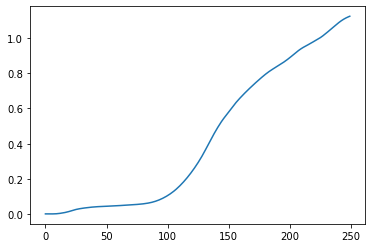

In [203]:
plt.plot(mse_iter)

### Different initial conditions

In [204]:
data = loadmat('kuramoto_sivishinky2.mat')
uu2 = data["uu"]
x2 = data['x']
tt2 = data['tt']

In [205]:
u2_in = uu2[:,:-1].T
u2_out = uu2[:,1:].T

In [206]:
mse2, mse_iter2, predict_ks2 = kspredict(u2_in,u2_out)

In [207]:
mse2

3.3751691006112177

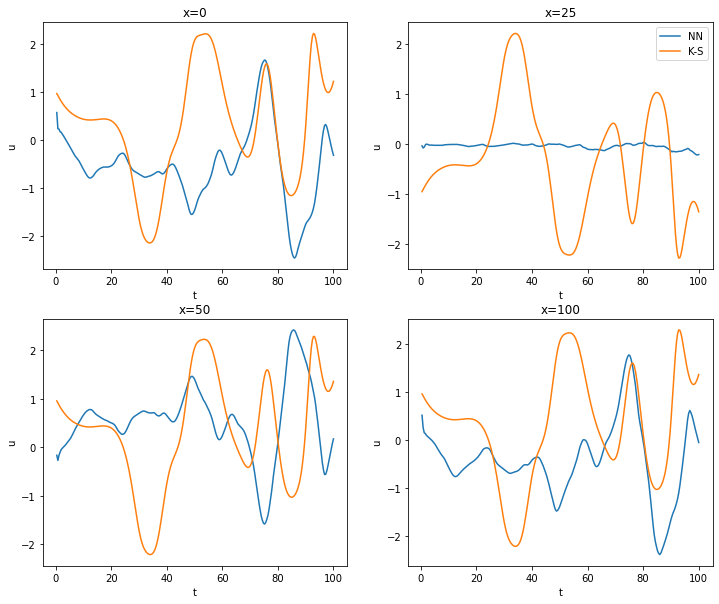

In [284]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(tt2[0,1:],predict_ks2[:,0])
plt.plot(tt2[0,1:],u2_out[:,0])
plt.title('x=%i' %x2[0,0])
plt.ylabel('u')
plt.xlabel('t')

plt.subplot(2,2,2)
plt.plot(tt2[0,1:],predict_ks2[:,255])
plt.plot(tt2[0,1:],u2_out[:,255])
plt.legend(['NN','K-S'])
plt.title('x=%i' %x2[255,0])
plt.ylabel('u')
plt.xlabel('t')

plt.subplot(2,2,3)
plt.plot(tt2[0,1:],predict_ks2[:,511])
plt.plot(tt2[0,1:],u2_out[:,511])
plt.title('x=%i' %x2[511,0])
plt.ylabel('u')
plt.xlabel('t')

plt.subplot(2,2,4)
plt.plot(tt2[0,1:],predict_ks2[:,1023])
plt.plot(tt2[0,1:],u2_out[:,1023])
plt.title('x=%i' %x2[1023,0])
plt.ylabel('u')
plt.xlabel('t')

plt.savefig('ks_predict.png')

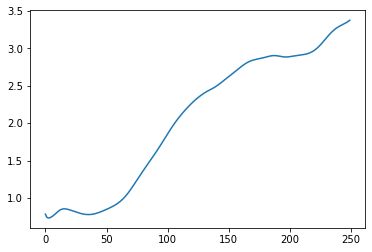

In [209]:
plt.plot(mse_iter2)

## Reaction-diffusion system

### Load Data

In [210]:
#First set for training
data = loadmat('reaction_diffusion_big.mat')

In [211]:
rd_u =data['u']
rd_v = data['v']
rd_x = data['x']
rd_y = data['y']
nx = rd_x.shape[1]
ny = rd_y.shape[1]
nt = data['t'].shape[0]
rd_t = data['t']

In [212]:
u = np.zeros((nt,nx*ny))
v = np.zeros((nt,nx*ny))

for i in range(0,nt):
    u[i,:] = np.reshape(rd_u[:,:,0],(nx*ny,))
    v[i,:] = np.reshape(rd_v[:,:,0],(nx*ny,))

In [213]:
uv = np.hstack((u,v))

In [214]:
#Second set of data for testing with different initial conditions
data = loadmat('reaction_diffusion_big2.mat')

In [215]:
rd_u2 =data['u']
rd_v2 = data['v']

In [216]:
u2 = np.zeros((nt,nx*ny))
v2 = np.zeros((nt,nx*ny))

for i in range(0,nt):
    u2[i,:] = np.reshape(rd_u2[:,:,0],(nx*ny,))
    v2[i,:] = np.reshape(rd_v2[:,:,0],(nx*ny,))

In [217]:
uv2 = np.hstack((u2,v2))

### Compute SVD

In [218]:
U, Sig, Vh = np.linalg.svd(uv.T, full_matrices=False)

In [219]:
U2, Sig2, Vh2 = np.linalg.svd(uv2.T, full_matrices=False)

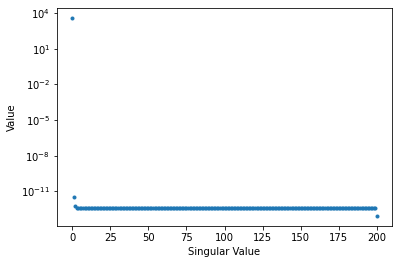

In [273]:
#Plot singular values of training data
plt.semilogy(Sig,'.')
plt.xlabel('Singular Value')
plt.ylabel('Value')

plt.savefig('singval.png')

### Model

In [221]:
def rdpredict(data,label, model_rd):
    prediction = np.zeros(label.shape)
    mse_iter = np.zeros(label.shape[0])
    
    init = np.reshape(data[0,:],(1,data.shape[1]))
    xk = init
    for i in range(0,prediction.shape[0]):
        prediction[i,:] = model_rd.predict(xk)
        mse_iter[i] = mean_squared_error(label[i,:],prediction[i,:])
        
        xk = np.reshape(prediction[i,:],(1,data.shape[1]))
    return mean_squared_error(label, prediction),prediction

In [222]:
def rdmodel(trainV, testV, U, Sig, rank):
    V_r = trainV[0:rank,:]
    V_r_test = testV[0:rank,:]
    
    train_input = V_r[:,0:-1].T
    train_output = V_r[:,1:].T
    
    test_input = V_r_test[:,0:-1].T
    test_output = V_r_test[:,1:].T
    
    model_rd = keras.Sequential()

    model_rd.add(layers.Dense(100, activation='sigmoid',  input_shape = (rank,)))
    model_rd.add(layers.Dense(100, activation='relu'))
    model_rd.add(layers.Dense(rank))

    model_rd.compile(loss='mean_squared_error', optimizer="adam", metrics=['accuracy'])
    hist = model_rd.fit(train_input, train_output, epochs=100)
    
    mse, pred= rdpredict(test_input, test_output, model_rd)
    
    return ((U[:,0:rank]*Sig[0:rank])@pred.T)

In [223]:
uv_recons = []
ranks = np.array([1,5,10,25,50,100])
for i in range(0,len(ranks)):
    uv_recon = rdmodel(Vh, Vh2, U2, Sig2, ranks[i])
    uv_recons.append(uv_recon)

Epoch 1/100
200/200 [==============================] - 0s 2ms/sample - loss: 0.0246 - acc: 0.0000e+00
Epoch 2/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0091 - acc: 0.0000e+00
Epoch 3/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0032 - acc: 0.0000e+00
Epoch 4/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0017 - acc: 0.0000e+00
Epoch 5/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0011 - acc: 0.0000e+00
Epoch 6/100
200/200 [==============================] - 0s 50us/sample - loss: 4.1476e-04 - acc: 0.0000e+00
Epoch 7/100
200/200 [==============================] - 0s 45us/sample - loss: 2.1378e-04 - acc: 0.0000e+00
Epoch 8/100
200/200 [==============================] - 0s 50us/sample - loss: 1.2397e-04 - acc: 0.0000e+00
Epoch 9/100
200/200 [==============================] - 0s 45us/sample - loss: 4.8835e-05 - acc: 0.0000e+00
Epoch 10/100
200/200 [==============================] - 0s

200/200 [==============================] - 0s 50us/sample - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 78/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 79/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 80/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 81/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 82/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 83/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 84/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 85/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 86/100
200/200 [===================

200/200 [==============================] - 0s 40us/sample - loss: 0.0032 - acc: 0.8850
Epoch 58/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0032 - acc: 0.8850
Epoch 59/100
200/200 [==============================] - 0s 40us/sample - loss: 0.0034 - acc: 0.8950
Epoch 60/100
200/200 [==============================] - 0s 40us/sample - loss: 0.0033 - acc: 0.8850
Epoch 61/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0032 - acc: 0.8850
Epoch 62/100
200/200 [==============================] - 0s 40us/sample - loss: 0.0033 - acc: 0.8900
Epoch 63/100
200/200 [==============================] - 0s 40us/sample - loss: 0.0032 - acc: 0.8850
Epoch 64/100
200/200 [==============================] - 0s 40us/sample - loss: 0.0032 - acc: 0.8950
Epoch 65/100
200/200 [==============================] - 0s 40us/sample - loss: 0.0032 - acc: 0.8900
Epoch 66/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0033 - acc: 0.8950
Epoch 67/100


200/200 [==============================] - 0s 55us/sample - loss: 0.0040 - acc: 0.8400
Epoch 39/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0039 - acc: 0.8400
Epoch 40/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0039 - acc: 0.8400
Epoch 41/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0039 - acc: 0.8500
Epoch 42/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0039 - acc: 0.8450
Epoch 43/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0039 - acc: 0.8350
Epoch 44/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0038 - acc: 0.8400
Epoch 45/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0039 - acc: 0.8500
Epoch 46/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0039 - acc: 0.8500
Epoch 47/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0037 - acc: 0.8400
Epoch 48/100


200/200 [==============================] - 0s 55us/sample - loss: 0.0044 - acc: 0.7950
Epoch 21/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0044 - acc: 0.7900
Epoch 22/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0044 - acc: 0.7950
Epoch 23/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0043 - acc: 0.7950
Epoch 24/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0043 - acc: 0.7900
Epoch 25/100
200/200 [==============================] - 0s 60us/sample - loss: 0.0043 - acc: 0.7900
Epoch 26/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0043 - acc: 0.8050
Epoch 27/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0043 - acc: 0.8000
Epoch 28/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0042 - acc: 0.8100
Epoch 29/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0042 - acc: 0.8050
Epoch 30/100


200/200 [==============================] - 0s 1ms/sample - loss: 0.1104 - acc: 0.0100
Epoch 2/100
200/200 [==============================] - 0s 60us/sample - loss: 0.0203 - acc: 0.0100
Epoch 3/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0106 - acc: 0.0000e+00
Epoch 4/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0066 - acc: 0.0050
Epoch 5/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0060 - acc: 0.0100
Epoch 6/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0057 - acc: 0.0150
Epoch 7/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0052 - acc: 0.5350
Epoch 8/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0051 - acc: 0.6300
Epoch 9/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0050 - acc: 0.6400
Epoch 10/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0049 - acc: 0.6350
Epoch 11/100
200/2

200/200 [==============================] - 0s 45us/sample - loss: 0.0037 - acc: 0.7350
Epoch 84/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0037 - acc: 0.7400
Epoch 85/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0037 - acc: 0.7450
Epoch 86/100
200/200 [==============================] - 0s 45us/sample - loss: 0.0037 - acc: 0.7500
Epoch 87/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0037 - acc: 0.7450
Epoch 88/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0037 - acc: 0.7500
Epoch 89/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0037 - acc: 0.7450
Epoch 90/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0037 - acc: 0.7500
Epoch 91/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0036 - acc: 0.7450
Epoch 92/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0036 - acc: 0.7400
Epoch 93/100


200/200 [==============================] - 0s 55us/sample - loss: 0.0043 - acc: 0.4800
Epoch 65/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0043 - acc: 0.4850
Epoch 66/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0043 - acc: 0.4850
Epoch 67/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0043 - acc: 0.5050
Epoch 68/100
200/200 [==============================] - 0s 60us/sample - loss: 0.0043 - acc: 0.5000
Epoch 69/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0043 - acc: 0.4950
Epoch 70/100
200/200 [==============================] - 0s 55us/sample - loss: 0.0043 - acc: 0.5100
Epoch 71/100
200/200 [==============================] - 0s 60us/sample - loss: 0.0043 - acc: 0.5250
Epoch 72/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0043 - acc: 0.5050
Epoch 73/100
200/200 [==============================] - 0s 50us/sample - loss: 0.0043 - acc: 0.5150
Epoch 74/100


In [224]:
rd_mses = []
for i in range(0,len(uv_recons)):
    rd_mse = mean_squared_error(uv2[1:,:],uv_recons[i].T)
    rd_mses.append(rd_mse)

Text(0, 0.5, 'Mean-squared Error')

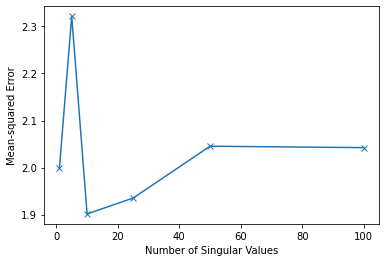

In [225]:
plt.plot(ranks,rd_mses,'-x')
plt.xlabel('Number of Singular Values')
plt.ylabel('Mean-squared Error')

In [226]:
mean_squared_error(uv2[1:,:],uv_recons[3].T)

1.9352931060622482

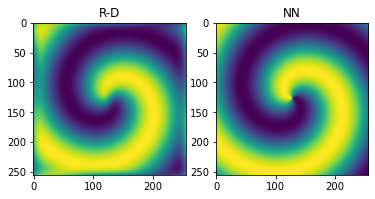

In [274]:
uv25 = uv_recons[2]

plt.subplot(1,2,1)
plt.imshow(rd_u2[:,:,10])
plt.title('R-D')

plt.subplot(1,2,2)
plt.imshow(np.fliplr(np.flipud(np.reshape(uv25[0:256**2,9],(256,256),order='A'))))
plt.title('NN')

plt.savefig('rd10_10.png')

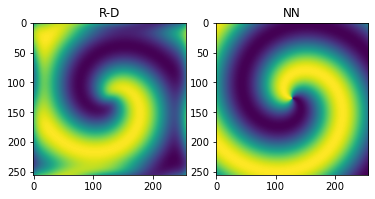

In [275]:
plt.subplot(1,2,1)
plt.imshow(rd_u2[:,:,30])
plt.title('R-D')

plt.subplot(1,2,2)
plt.imshow(np.fliplr(np.flipud(np.reshape(uv25[0:256**2,29],(256,256),order='A'))))
plt.title('NN')

plt.savefig('rd10_30.png')

In [270]:
rd_t[10,0]

0.5

## Lorentz Equation

In [229]:
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

In [230]:
# Generate data for the lorenz system for a given random seed and value of rho
def lorenz_data(r,seed):
    dt = 0.01
    T = 8
    t = np.arange(0,T+dt,dt)
    beta = 8/3
    sigma = 10
    rho = r


    nn_input = np.zeros((100*(len(t)-1),3))
    nn_output = np.zeros_like(nn_input)

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
    
    #initial conditions
    np.random.seed(seed)
    x0 = -15 + 30 * np.random.random((100, 3))

    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                      for x0_j in x0])

    for j in range(100):
        nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
        nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
        x, y, z = x_t[j,:,:].T
        
    return nn_input, nn_output

### Creating training data

In [287]:
lz10_input, lz10_output = lorenz_data(10,123)
lz28_input, lz28_output = lorenz_data(28,123)
lz40_input, lz40_output = lorenz_data(40,123)

In [232]:
#Add the rho value to the input data as a 4th column
lz10_input = np.hstack((lz10_input,10*np.ones((lz10_input.shape[0],1))))
lz28_input = np.hstack((lz28_input,28*np.ones((lz28_input.shape[0],1))))
lz40_input = np.hstack((lz40_input,40*np.ones((lz40_input.shape[0],1))))

lztrain_input = np.vstack((lz10_input,lz28_input,lz40_input))
lztrain_output = np.vstack((lz10_output,lz28_output,lz40_output))

### Model data

In [233]:
model_lz = keras.Sequential()

model_lz.add(layers.Dense(10, activation='linear',  input_shape = (4,)))
model_lz.add(layers.Dense(10, activation='sigmoid'))
model_lz.add(layers.Dense(10, activation='relu'))
model_lz.add(layers.Dense(3))

model_lz.compile(loss='mean_squared_error', optimizer="adam", metrics=['accuracy'])
hist_lz = model_lz.fit(lztrain_input, lztrain_output, epochs=30)

Epoch 1/30
240000/240000 [==============================] - 8s 34us/sample - loss: 22.8654 - acc: 0.9825
Epoch 2/30
240000/240000 [==============================] - 8s 32us/sample - loss: 0.4171 - acc: 0.9932
Epoch 3/30
240000/240000 [==============================] - 8s 32us/sample - loss: 0.1795 - acc: 0.9972
Epoch 4/30
240000/240000 [==============================] - 8s 34us/sample - loss: 0.1243 - acc: 0.9982
Epoch 5/30
240000/240000 [==============================] - 8s 35us/sample - loss: 0.1028 - acc: 0.9983
Epoch 6/30
240000/240000 [==============================] - 9s 37us/sample - loss: 0.0918 - acc: 0.9984
Epoch 7/30
240000/240000 [==============================] - 8s 33us/sample - loss: 0.0798 - acc: 0.9985
Epoch 8/30
240000/240000 [==============================] - 8s 33us/sample - loss: 0.0751 - acc: 0.9986
Epoch 9/30
240000/240000 [==============================] - 8s 32us/sample - loss: 0.0677 - acc: 0.9987
Epoch 10/30
240000/240000 [==============================] - 9s

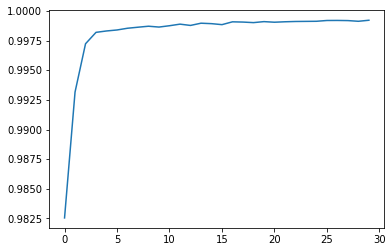

In [234]:
plt.plot(hist_lz.history['acc'])

### Create testing data

In [235]:
lz17_input, lz17_output = lorenz_data(17,123)
lz35_input, lz35_output = lorenz_data(35,123)

### Test Model

In [236]:
def lzpredict(data,label,rho):
    prediction = np.zeros(label.shape)
    mse_iter = np.zeros((100,800))
    
    for i in range(0,100):
        init = np.reshape(data[i*800,:],(1,data.shape[1]))
        xk = init
        for j in range(0,800):
            row = np.hstack((xk,rho*np.ones((1,1))))
            prediction[i*800+j,:] = model_lz.predict(row)
            mse_iter[i,j] = mean_squared_error(label[i*800:1+i*800+j,:],prediction[i*800:1+i*800+j,:])
            
            xk = np.reshape(prediction[i*800+j,:],(1,data.shape[1]))

    return mean_squared_error(label,prediction), mse_iter, prediction

In [237]:
mse_lz17, mse_iter_lz17, pred_lz17 = lzpredict(lz17_input, lz17_output,17)

In [238]:
avg = mse_iter_lz17[:,0:800].mean(axis=0)

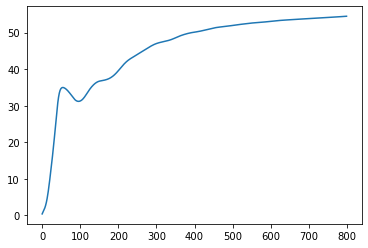

In [239]:
plt.plot(avg)

In [240]:
mse_lz17

54.45103889579389

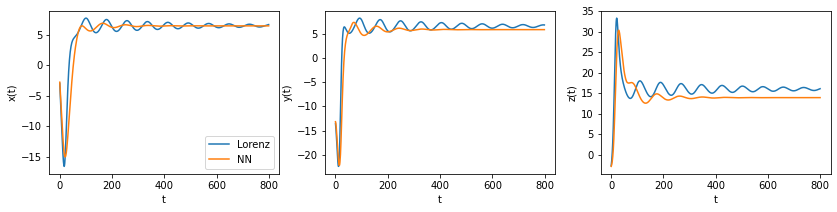

In [276]:
start = 4
end = start + 1
plt.figure(figsize=(14,3))

plt.subplot(1,3,1)
plt.plot(lz17_output[start*800:end*800,0])
plt.plot(pred_lz17[start*800:end*800,0])
plt.legend(['Lorenz', 'NN'])
plt.ylabel('x(t)')
plt.xlabel('t')

plt.subplot(1,3,2)
plt.plot(lz17_output[start*800:end*800,1])
plt.plot(pred_lz17[start*800:end*800,1])
plt.ylabel('y(t)')
plt.xlabel('t')

plt.subplot(1,3,3)
plt.plot(lz17_output[start*800:end*800,2])
plt.plot(pred_lz17[start*800:end*800,2])
plt.ylabel('z(t)')
plt.xlabel('t')

plt.savefig('lz17.png')

In [242]:
mse_lz35, mse_iter_lz35, pred_lz35 = lzpredict(lz35_input, lz35_output,35)

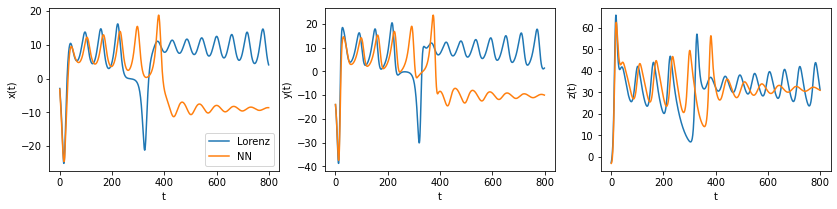

In [286]:
start = 4
end = start + 1
plt.figure(figsize=(14,3))

plt.subplot(1,3,1)
plt.plot(lz35_output[start*800:end*800,0])
plt.plot(pred_lz35[start*800:end*800,0])
plt.legend(['Lorenz', 'NN'])
plt.ylabel('x(t)')
plt.xlabel('t')

plt.subplot(1,3,2)
plt.plot(lz35_output[start*800:end*800,1])
plt.plot(pred_lz35[start*800:end*800,1])
plt.ylabel('y(t)')
plt.xlabel('t')

plt.subplot(1,3,3)
plt.plot(lz35_output[start*800:end*800,2])
plt.plot(pred_lz35[start*800:end*800,2])
plt.ylabel('z(t)')
plt.xlabel('t')

plt.savefig('lz35.png')

In [244]:
mse_lz35

125.92265728809348

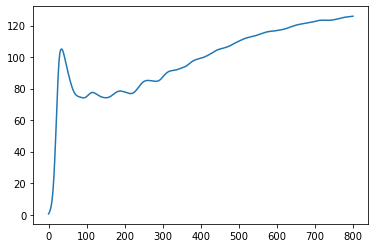

In [245]:
plt.plot(mse_iter_lz35.mean(axis=0))